In [48]:
import numpy as np
import matplotlib.pyplot as plt

In [49]:
# define coorinate points
p0 = [50, 50]
p1 = [120, 80]
p2 = [120, 120]
p3 = [55, 130]

In [50]:
def getAngle(current, next):
    x = next[0] - current[0]
    y = next[1] - current[1]
    angle = np.arctan2(y, x)
    angle = np.rad2deg(angle)
    return angle

In [51]:
# evaluate angles
angle0 = getAngle(p0, p1)
angle1 = getAngle(p1, p2)
angle2 = getAngle(p2, p3)
angle3 = getAngle(p3, p0)

print(angle0)
print(angle1)
print(angle2)
print(angle3)

print("Normalized angles:")
angle0 = np.mod(angle0, 360)
angle1 = np.mod(angle1, 360)
angle2 = np.mod(angle2, 360)
angle3 = np.mod(angle3, 360)

print(angle0)
print(angle1)
print(angle2)
print(angle3)


23.19859051364819
90.0
171.2538377374448
-93.57633437499736
Normalized angles:
23.19859051364819
90.0
171.2538377374448
266.4236656250026


(25.0, 135.0, 25.0, 135.0)

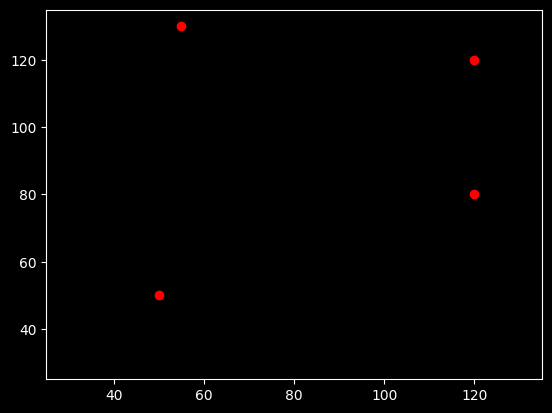

In [52]:
# plot points
x = [p0[0], p1[0], p2[0], p3[0]]
y = [p0[1], p1[1], p2[1], p3[1]]
plt.plot(x, y, 'ro')
plt.axis([25, 135, 25, 135])

In [57]:
def calcAngle(x0, y0, x1, y1):
    newAngle = np.arctan2((y1-y0),(x1-x0))
   
    # convert to degrees
    newAngle = np.rad2deg(newAngle)
    
    # normalize angle
    newAngle = np.mod(newAngle, 360)
    
    return newAngle

In [58]:
print(calcAngle(p0[0], p1[0], p0[1], p1[1]))

(270.0, -90.0)
